In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("angel_timestamps.csv")
df['datetime'] = pd.to_datetime(df['Start Time'])
df = df.sort_values(by = 'datetime', ascending=True)

In [3]:
df['time_delta'] = df["datetime"].diff()

In [4]:
df = df.drop('Start Time', axis=1)


In [5]:
df.columns

Index(['Unnamed: 0', 'datetime', 'time_delta'], dtype='object')

In [6]:
df['time_delta'].describe()

count                         5092
mean     0 days 06:37:41.868224666
std      0 days 23:37:50.115210269
min                0 days 00:00:00
25%                0 days 00:16:30
50%                0 days 00:29:08
75%         0 days 02:13:28.750000
max               25 days 01:35:12
Name: time_delta, dtype: object

In [7]:
df['days'] = pd.DatetimeIndex(df['datetime']).day

In [8]:
df['month'] = pd.DatetimeIndex(df['datetime']).month

In [9]:
df

,Unnamed: 0,datetime,time_delta,days,month
4078,4078,2019-12-16 16:25:02,NaT,16,12
4077,4077,2019-12-16 16:28:45,0 days 00:03:43,16,12
4076,4076,2019-12-16 16:29:00,0 days 00:00:15,16,12
4075,4075,2019-12-16 16:30:32,0 days 00:01:32,16,12
4074,4074,2019-12-16 16:34:11,0 days 00:03:39,16,12
...,...,...,...,...,...
0,0,2023-10-22 18:40:42,0 days 00:49:28,22,10
2166,2166,2023-10-22 20:13:07,0 days 01:32:25,22,10
2165,2165,2023-10-22 20:47:13,0 days 00:34:06,22,10
2164,2164,2023-10-22 22:49:10,0 days 02:01:57,22,10


In [32]:
df_by_day = df.groupby(['days', 'month']).count()
df_by_day

Unnamed: 0  datetime  time_delta
days month                                  
1    1               8         8           8
     2               6         6           6
     3               4         4           4
     4              14        14          14
     5               9         9           9
...                ...       ...         ...
31   5              24        24          24
     7              16        16          16
     8              26        26          26
     10              4         4           4
     12              2         2           2

[345 rows x 3 columns]

In [11]:
df_by_day[df_by_day['datetime'] == df_by_day['datetime'].max()]

,,Unnamed: 0,datetime,time_delta
days,month,,,
20,7,72,72,72


looks like the most comon date was the 20th of july

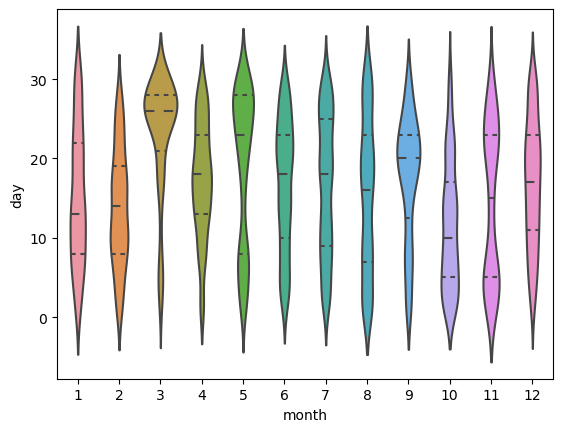

In [31]:
# plt.figure(figsize=(8, 6))

# sb.histplot(x = 'days', y= 'datetime', hue ='month', data=df_by_day, multiple="stack",     edgecolor=".3",
#     linewidth=.5,)
plot = sb.violinplot(x='month', y='days', data = df, inner='quartiles').set(xlabel = "month", ylabel = 'day')


visualization of when the rows were recorded in the month by day

My guess as to what the data is: I think this could be music or location data. The number of instances per day seems a little low to be spotify, however I don't know how often Angel listens to music. Given the highly variat time between instances beint recorded I think the most likely option is music. I think I could improve my guess by looking at other datasets of either music or location data and comparing them to this one.